In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [173]:
btc = pd.read_csv('/content/drive/MyDrive/data/bitcoin.csv')
doge = pd.read_csv('/content/drive/MyDrive/data/dogecoin.csv')
eth = pd.read_csv('/content/drive/MyDrive/data/ethereum.csv')
iota = pd.read_csv('/content/drive/MyDrive/data/iota.csv')
tron = pd.read_csv('/content/drive/MyDrive/data/tron.csv')

In [ ]:
btc.head()

,Unnamed: 0,timestamp,Asset,Count,Open,High,Low,Close,Volume,VWAP,Target
0,0,1514764860,Bitcoin,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
1,2,1514764920,Bitcoin,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
2,4,1514764980,Bitcoin,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
3,6,1514765040,Bitcoin,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
4,8,1514765100,Bitcoin,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


In [175]:
def drop_unnamed(data):
  data.drop(columns = ['Unnamed: 0'], inplace = True)

In [176]:
coins = [btc, doge, eth, iota, tron]

In [177]:
for i in coins:
  drop_unnamed(i)

# Converting timestamp to date-time


In [178]:
def timestamp(data):
  data['time'] = pd.to_datetime(data['timestamp'], unit='s')

In [179]:
for i in coins:
  timestamp(i)

In [ ]:
def candle_plot(data):
  data_short = data.iloc[-200:]
  fig = go.Figure(data = [
      go.Candlestick(
          x = data_short.index,
          open = data_short.Open,
          high = data_short.High,
          low = data_short.Low,
          close = data_short.Close,
          )
  ])
  return fig.show()

In [ ]:
candle_plot(btc)

In [ ]:
candle_plot(doge)

In [ ]:
candle_plot(eth)

In [ ]:
candle_plot(iota)

In [ ]:
candle_plot(tron)

In [ ]:
def plot_close(data):
  plt.figure(figsize = (20, 6))
  coin = data['Asset'][0]
  plt.plot(data['Close'], label=coin)
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel(coin)

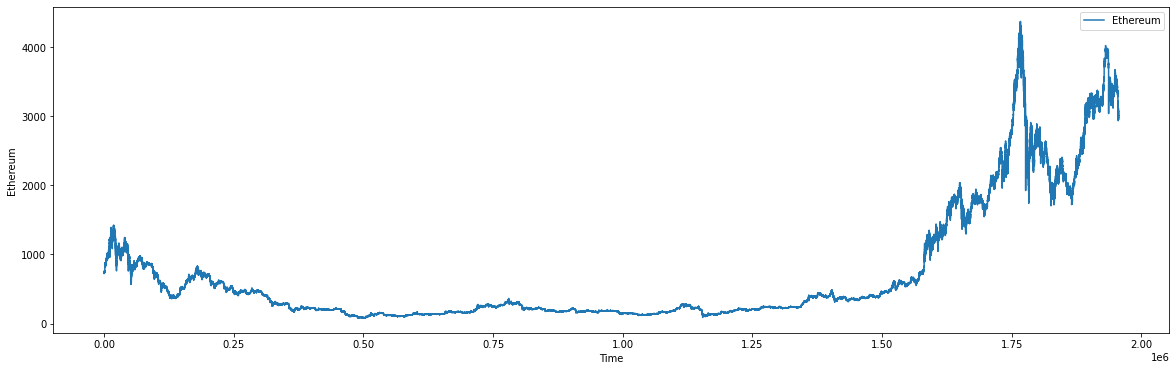

In [ ]:
plot_close(eth)

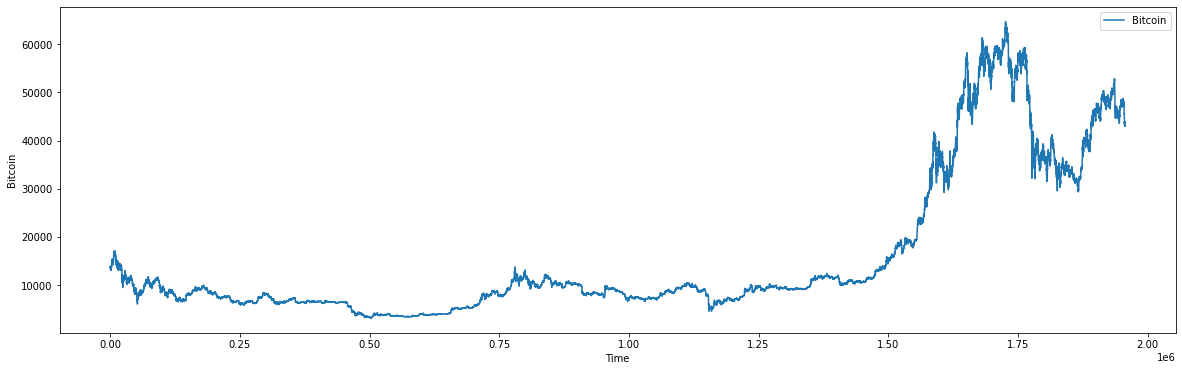

In [ ]:
plot_close(btc)

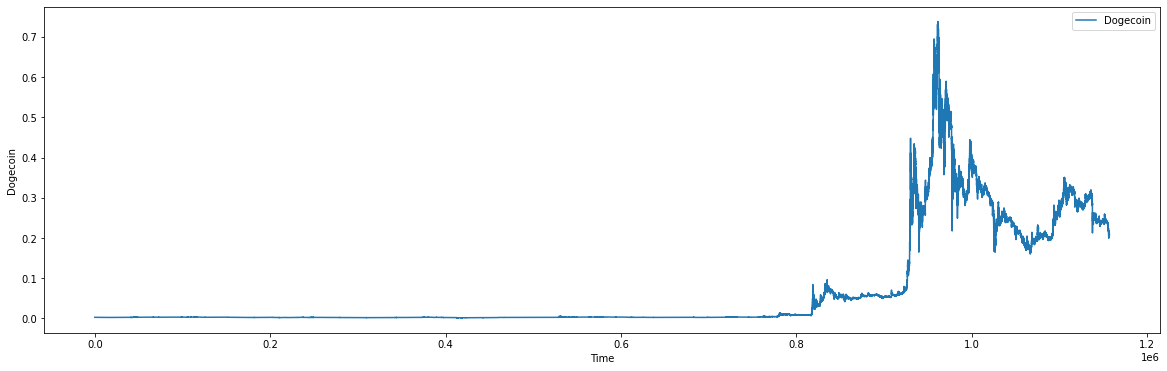

In [ ]:
plot_close(doge)

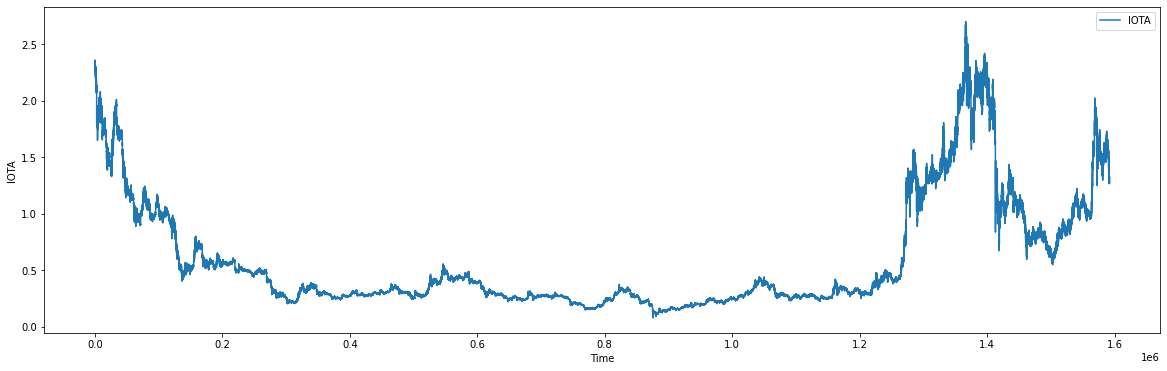

In [ ]:
plot_close(iota)

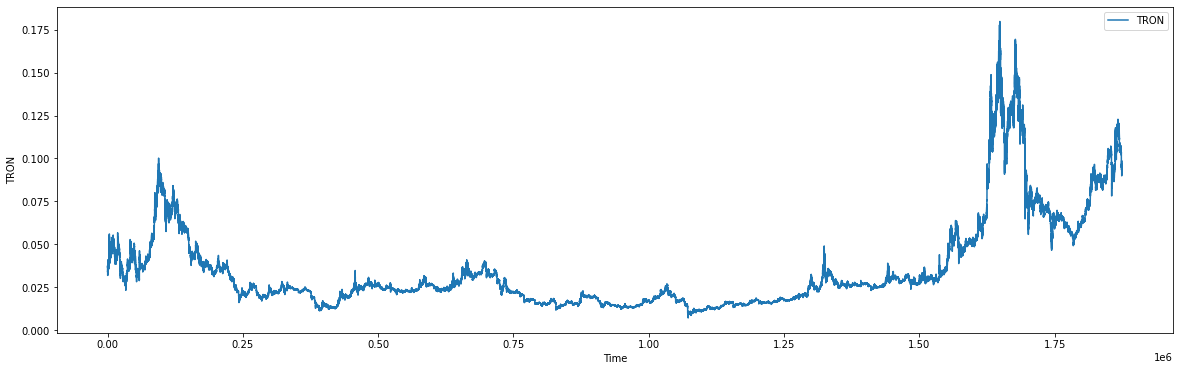

In [ ]:
plot_close(tron)

In [ ]:
def vol_traded(data):
  data = data[-50:]
  area = px.area(data_frame=data,
              x = data.index ,
              y = "Volume",
              markers = True)
  area.update_traces(line_color='Red')
  area.update_xaxes(
      title_text = 'Time',
      rangeslider_visible = True)
  area.update_yaxes(title_text = 'No of trades every minute')
  area.update_layout(showlegend = True)
  return area

In [ ]:
vol_traded(eth)

In [ ]:
vol_traded(btc)


In [ ]:
vol_traded(doge)


In [ ]:
vol_traded(iota)


In [ ]:
vol_traded(tron)


In [188]:
def get_time_series_features(data):
    """
    Creates time series features from datetime index.
    """
    data['hour'] = data['time'].dt.hour
    data['dayofweek'] = data['time'].dt.dayofweek
    data['quarter'] = data['time'].dt.quarter
    data['month'] = data['time'].dt.month
    data['year'] = data['time'].dt.year
    data['dayofyear'] = data['time'].dt.dayofyear
    data['dayofmonth'] = data['time'].dt.day
    data['weekofyear'] = data['time'].dt.isocalendar().week

In [189]:
for i in coins:
  get_time_series_features(i)

In [221]:
def boxplot(data):
  fig, axs = plt.subplots(1,3, 
                        figsize = (30,10), 
                        sharex = True)

  axs = axs.flatten()

  sns.boxplot(data=data.query('year == 2019'), 
              x='month', 
              y='VWAP', 
              ax = axs[0])
  coin = data['Asset'][0]
  axs[0].set_title(f'2019 - {coin}')

  sns.boxplot(data=data.query('year == 2020'), 
              x='month',
              y='VWAP', 
              ax = axs[1])
  axs[1].set_title(f'2020 - {coin}')

  sns.boxplot(data=data.query('year == 2021'), 
              x='month', 
              y='VWAP', 
              ax = axs[2])
  axs[2].set_title(f'2021 - {coin}')

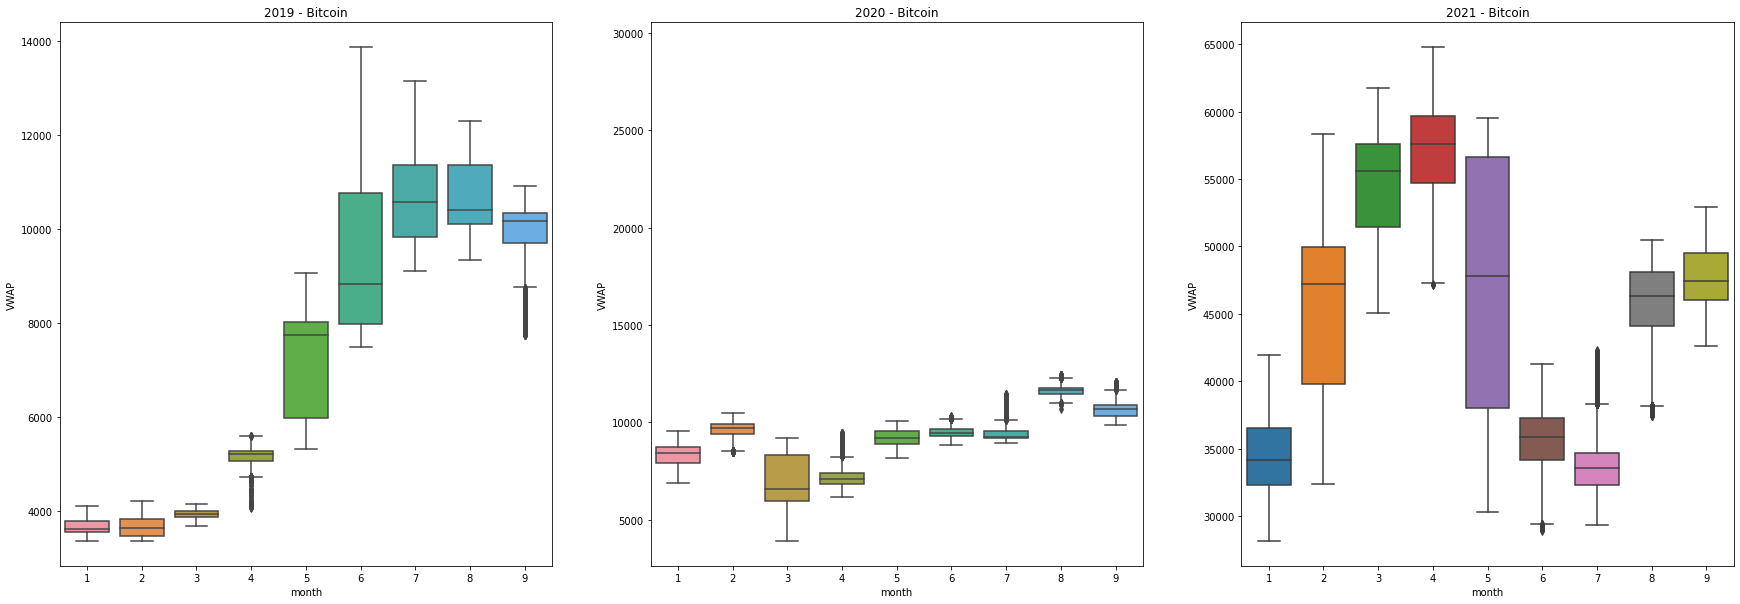

In [222]:
boxplot(btc)

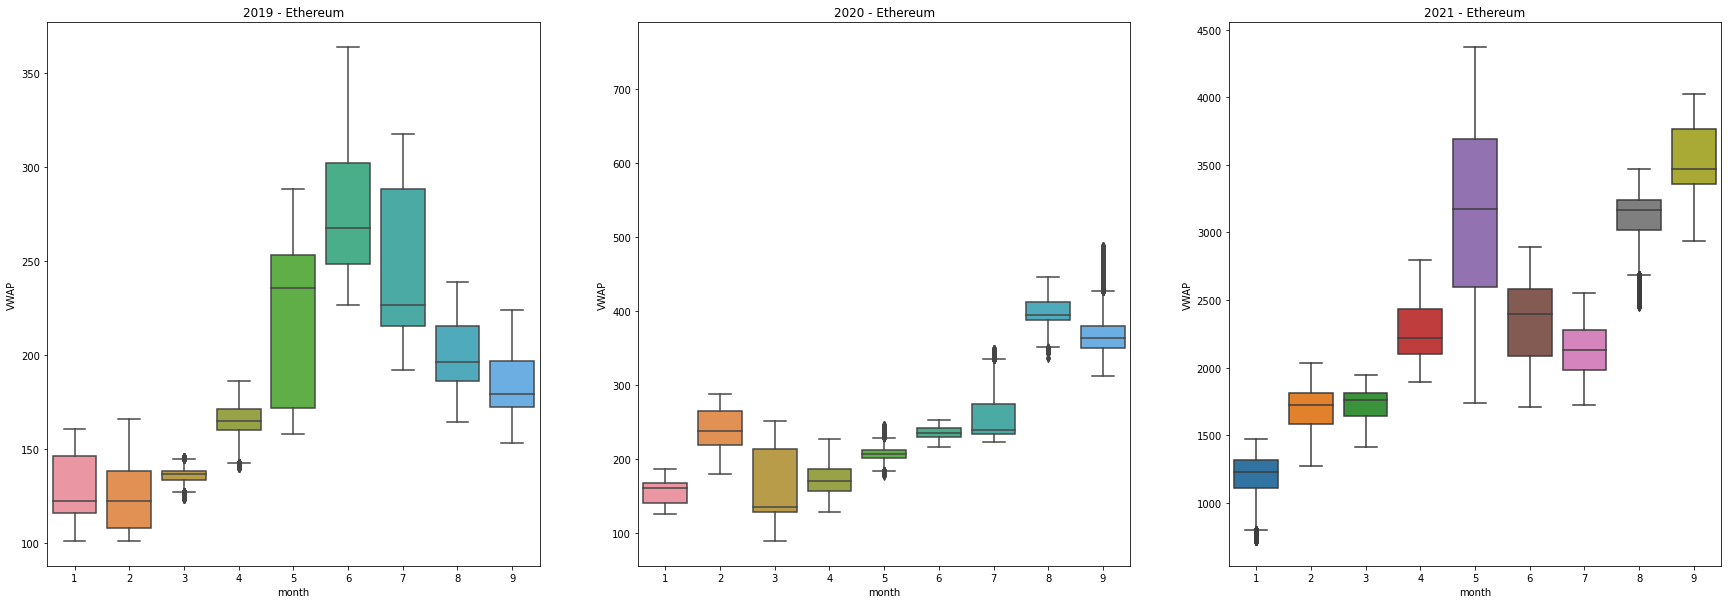

In [223]:
boxplot(eth)

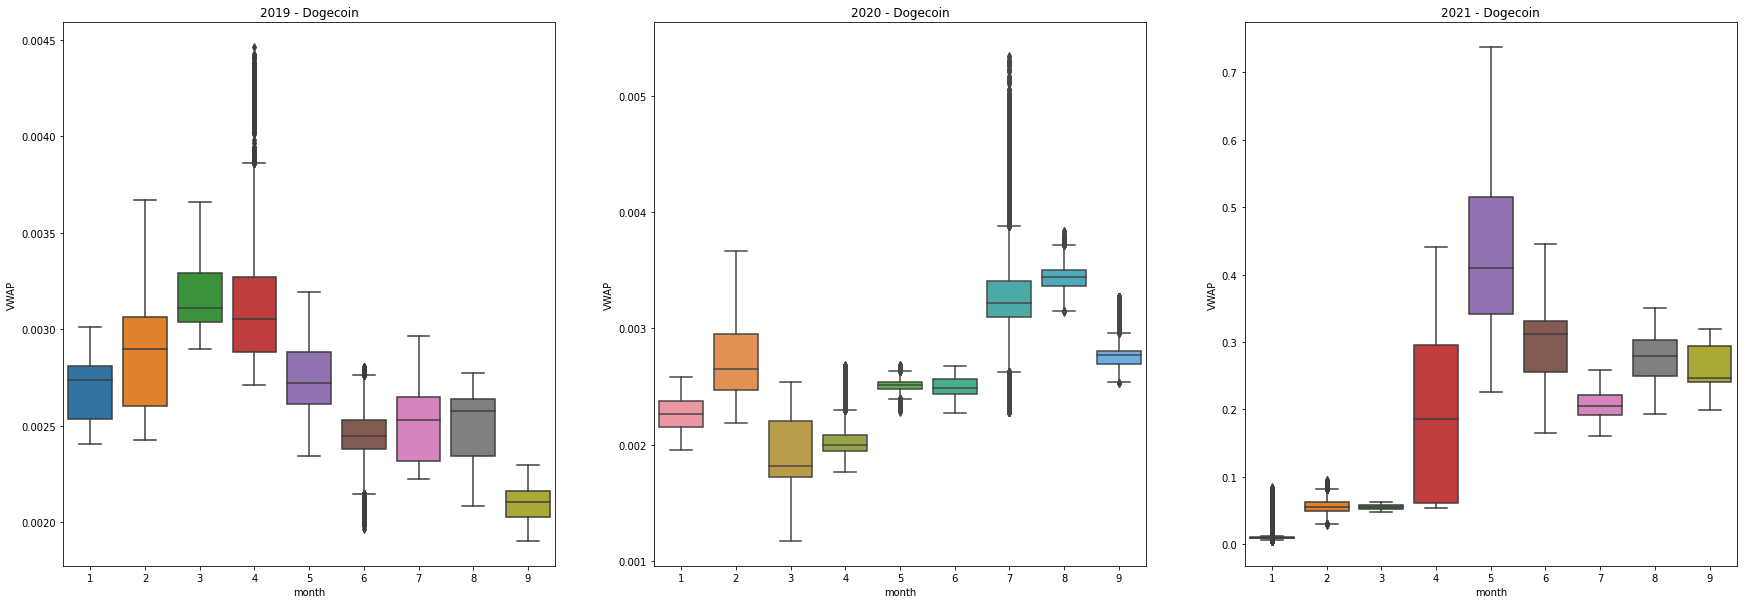

In [224]:
boxplot(doge)

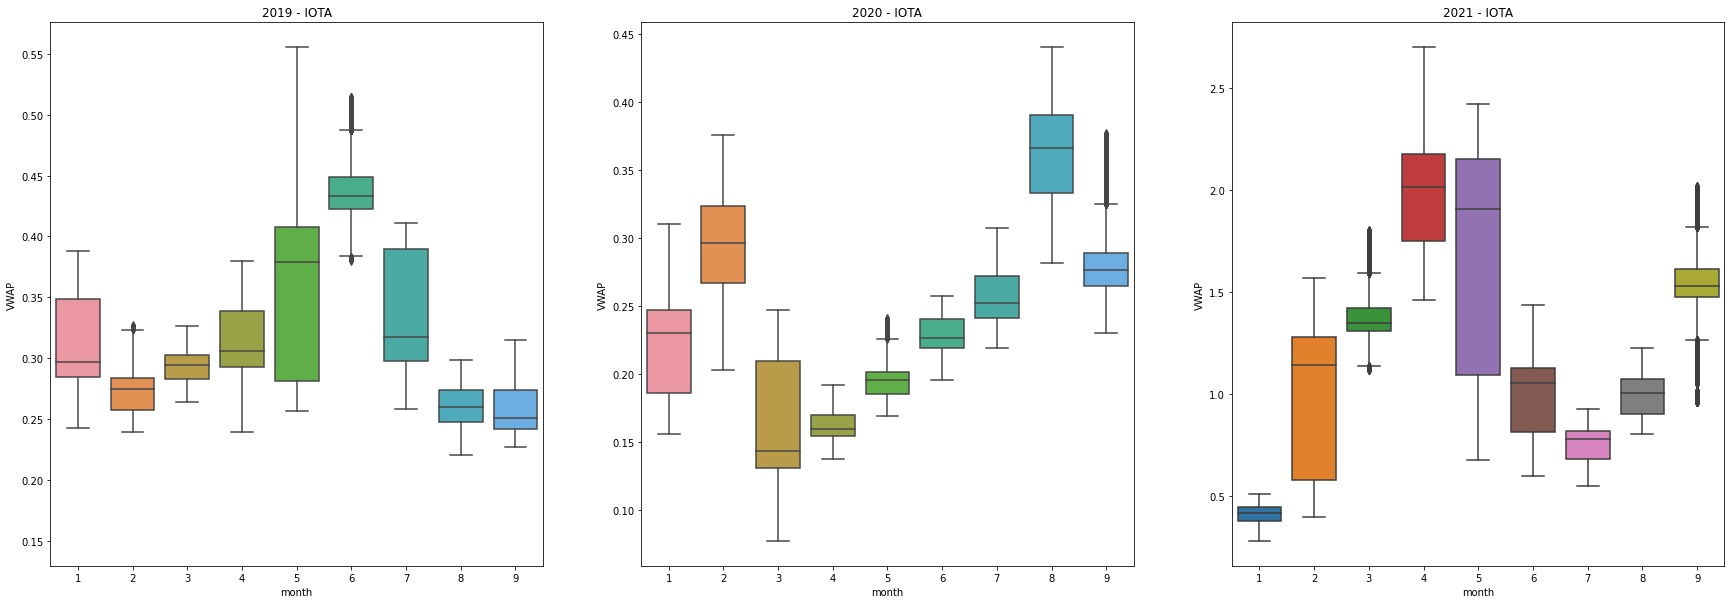

In [225]:
boxplot(iota)

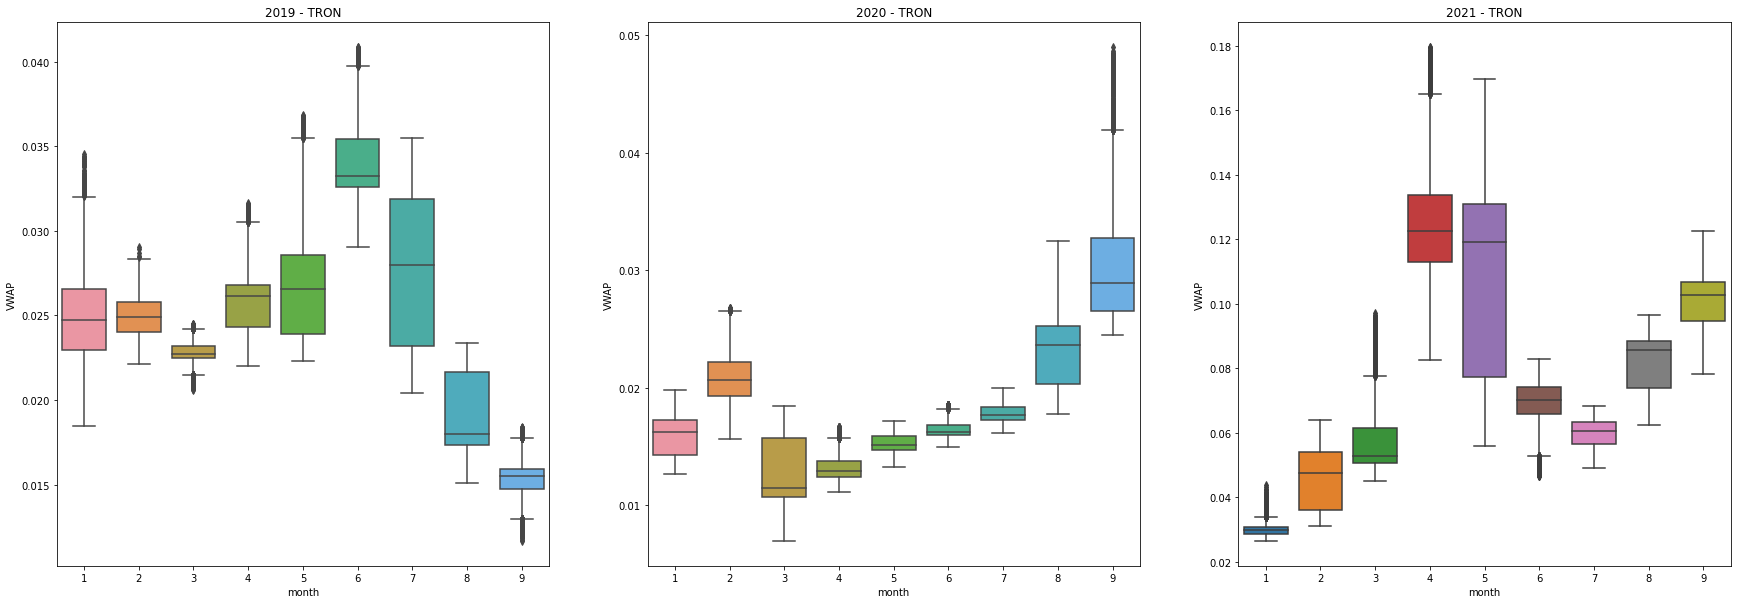

In [226]:
boxplot(tron)

In [243]:
def pctChange(data):
  data = data.copy()
  data['Daily Return'] = data['Close'].pct_change()

  # To plot the daily return percentage
  fig, axes = plt.subplots(nrows=1, ncols=1)
  fig.set_figheight(8)
  fig.set_figwidth(30)

  data['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
  axes.set_title(f"Percentage change between current and previous value -> {data['Asset'][0]}")

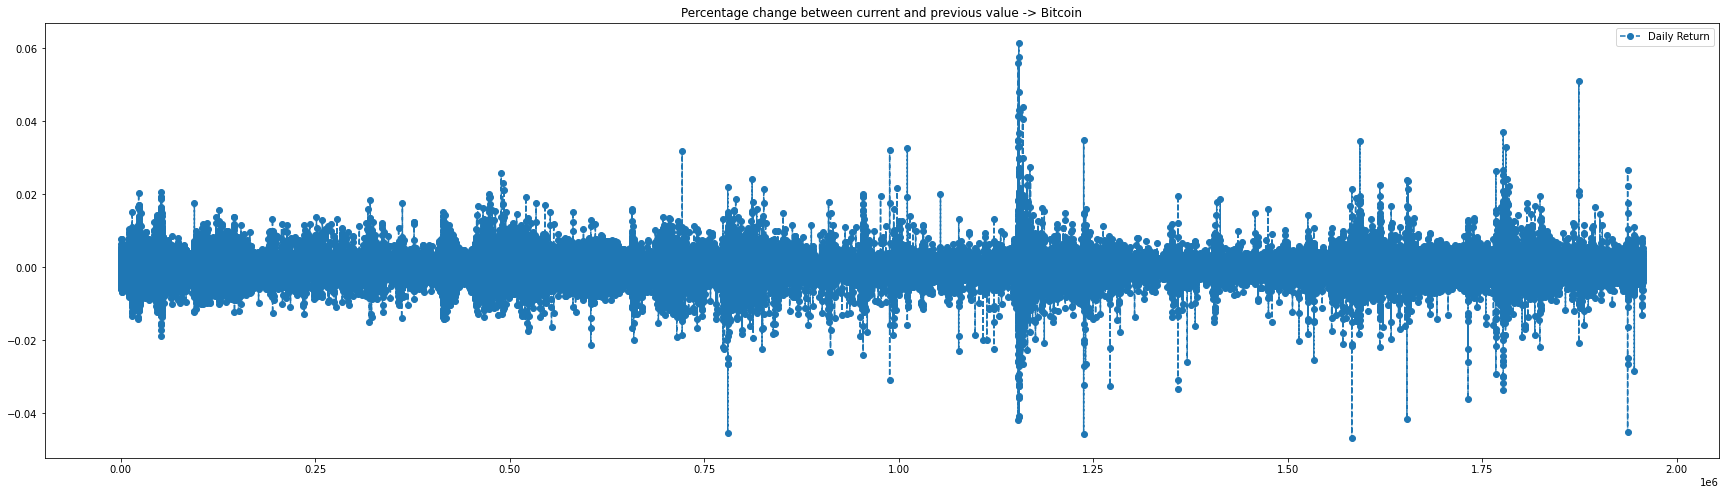

In [244]:
pctChange(btc)

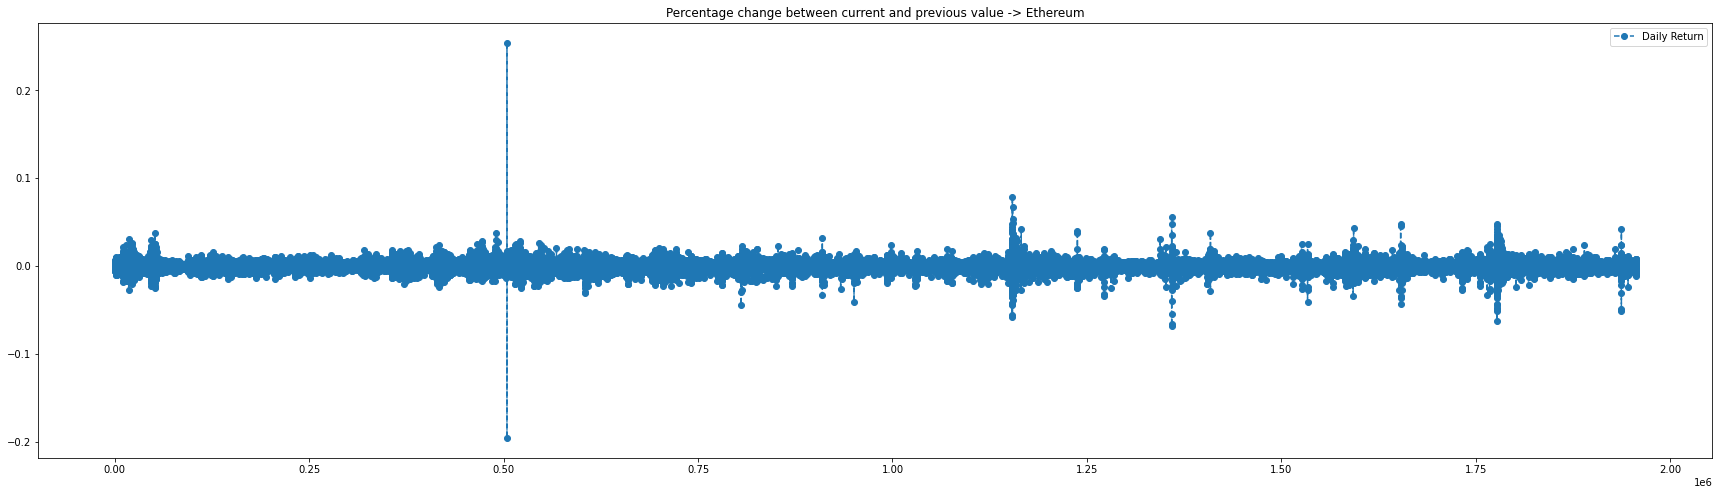

In [245]:
pctChange(eth)

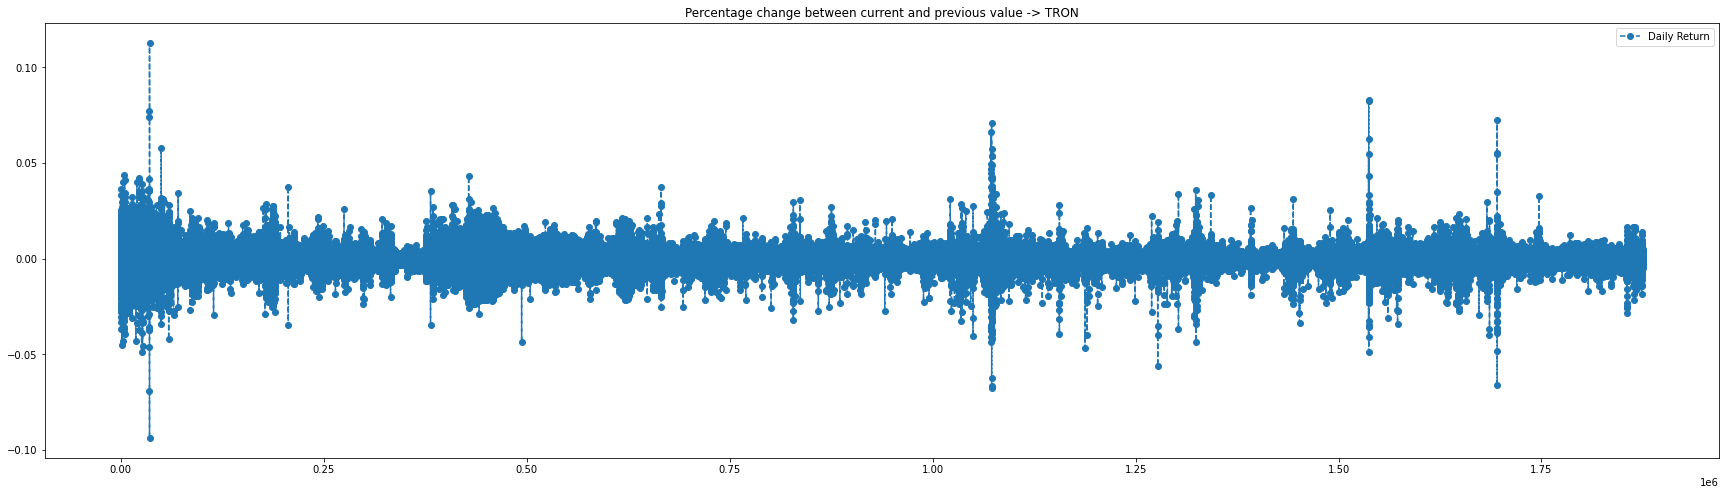

In [246]:
pctChange(tron)

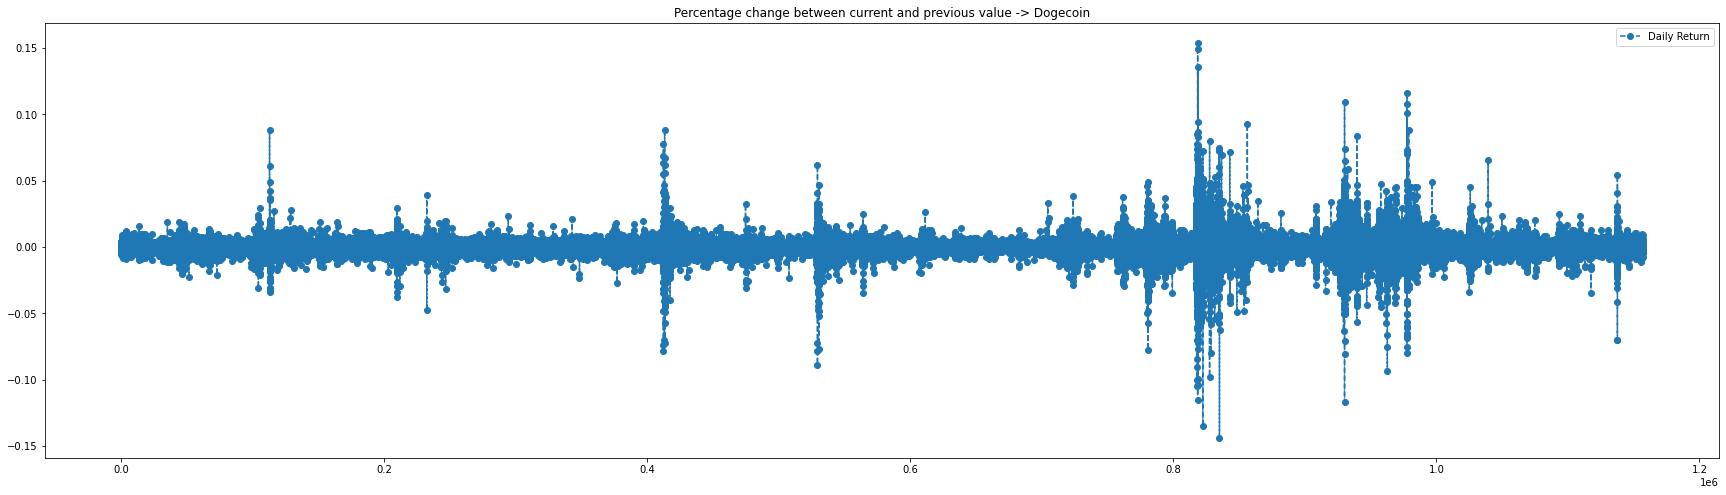

In [247]:
pctChange(doge)

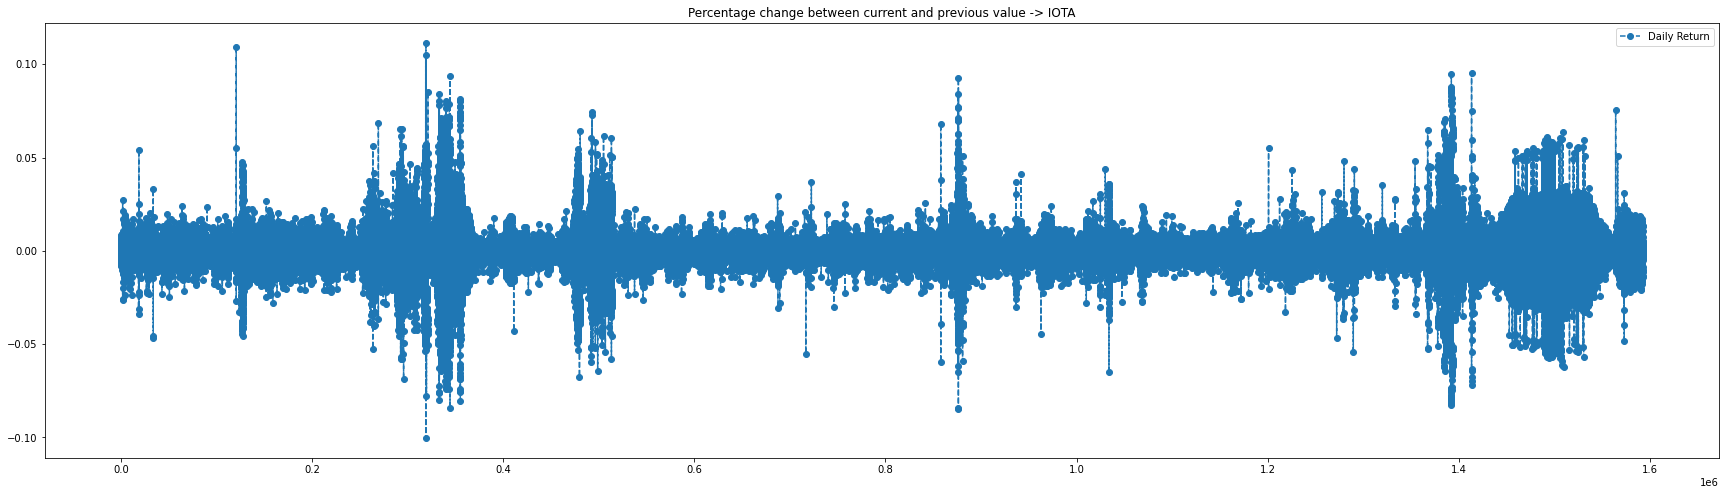

In [248]:
pctChange(iota)